# WQD7005 - Data Mining
## Continuous Assessment
## Milestone 4

#### Matrix Number : 17043640

#### Name                 : Gunasegarran Magadevan

### Importing the data from downloaded hiveserver2

In [1]:
#importing libraries
import csv
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Importing all csv from Milestone3 - through hiveserver2
oilCrawl = pd.read_csv("../Milestone3/hiveData/goldrate_hive.csv")
goldRate = pd.read_csv("../Milestone3/hiveData/oilrate_hive.csv")
currencyExchange = pd.read_csv("../Milestone3/hiveData/currencyexchange_hive.csv")

In [3]:
#Viewing oilCrawl
oilCrawl.head()

,MonthYear,Price(USD),Open(USD),High(USD),Low(USD),Volume(USD),Change %
0,Mar 20,1502.5,1587.05,1703.9,1451.0,1720.0,-4.10
1,Feb 20,1566.7,1597.80,1691.7,1551.1,7430.0,-1.34
2,Jan 20,1587.9,1527.50,1619.6,1526.0,2150.0,4.50
3,Dec 19,1519.5,1462.80,1523.4,1453.3,12300.0,3.68
4,Nov 19,1465.6,1511.00,1511.6,1447.1,97340.0,-3.03


In [4]:
#Viewing goldRate
goldRate.head()

,Year,Price(USD),Open(USD),High(USD),Low(USD),Close(USD),Change %
0,2020,50.73,61.18,63.27,28.93,28.93,-52.62
1,2019,57.05,46.54,66.30,46.54,61.06,34.46
2,2018,64.90,60.37,76.41,42.53,45.41,-24.84
3,2017,50.84,52.33,60.42,42.53,60.42,12.47
4,2016,43.58,36.76,54.06,26.21,53.72,45.03


In [5]:
#Viewing currencyExchange
currencyExchange.head()

,MonthYear,Price(USD),Open(USD),High(USD),Low(USD),Change %
0,Mar 20,4.3505,4.2125,4.3505,4.1595,3.25
1,Feb 20,4.2135,4.0975,4.2435,4.0965,2.87
2,Jan 20,4.0960,4.0890,4.1120,4.0510,0.13
3,Dec 19,4.0905,4.1775,4.1815,4.0895,-2.06
4,Nov 19,4.1765,4.1765,4.1865,4.1215,-0.05


### Interpretation of data & Communication of Insights of data

#### oilCrawl versus currencyExchange

In [6]:
# merging oilCrawl and currencyExchange, by MonthYear (foreignKey indexing)
oilExchange = pd.merge(oilCrawl, currencyExchange, on = 'MonthYear')
oilExchange.head()

,MonthYear,Price(USD)_x,Open(USD)_x,High(USD)_x,Low(USD)_x,Volume(USD),Change %_x,Price(USD)_y,Open(USD)_y,High(USD)_y,Low(USD)_y,Change %_y
0,Mar 20,1502.5,1587.05,1703.9,1451.0,1720.0,-4.10,4.3505,4.2125,4.3505,4.1595,3.25
1,Feb 20,1566.7,1597.80,1691.7,1551.1,7430.0,-1.34,4.2135,4.0975,4.2435,4.0965,2.87
2,Jan 20,1587.9,1527.50,1619.6,1526.0,2150.0,4.50,4.0960,4.0890,4.1120,4.0510,0.13
3,Dec 19,1519.5,1462.80,1523.4,1453.3,12300.0,3.68,4.0905,4.1775,4.1815,4.0895,-2.06
4,Nov 19,1465.6,1511.00,1511.6,1447.1,97340.0,-3.03,4.1765,4.1765,4.1865,4.1215,-0.05


In [7]:
#creating new column VS_Change, by subtracting Change %_y (oilCrawl) and Change %_x(currencyExchange)
oilExchange['VS_Change'] = pd.to_numeric(oilExchange['Change %_y'].values) - pd.to_numeric(oilExchange['Change %_x'].values)
oilExchange.head()

,MonthYear,Price(USD)_x,Open(USD)_x,High(USD)_x,Low(USD)_x,Volume(USD),Change %_x,Price(USD)_y,Open(USD)_y,High(USD)_y,Low(USD)_y,Change %_y,VS_Change
0,Mar 20,1502.5,1587.05,1703.9,1451.0,1720.0,-4.10,4.3505,4.2125,4.3505,4.1595,3.25,7.35
1,Feb 20,1566.7,1597.80,1691.7,1551.1,7430.0,-1.34,4.2135,4.0975,4.2435,4.0965,2.87,4.21
2,Jan 20,1587.9,1527.50,1619.6,1526.0,2150.0,4.50,4.0960,4.0890,4.1120,4.0510,0.13,-4.37
3,Dec 19,1519.5,1462.80,1523.4,1453.3,12300.0,3.68,4.0905,4.1775,4.1815,4.0895,-2.06,-5.74
4,Nov 19,1465.6,1511.00,1511.6,1447.1,97340.0,-3.03,4.1765,4.1765,4.1865,4.1215,-0.05,2.98


In [8]:
# function for USD converting to MYR
# https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=MYR
def USD2MYR(x):
    convert= pd.to_numeric(x) * 4.35
    return convert

oilExchange['Price_oilRate_MYR'] = round(oilExchange['Price(USD)_x'].apply(USD2MYR),2)
oilExchange['Price_CurrencyExchange_MYR'] = round(oilExchange['Price(USD)_y'].apply(USD2MYR),2)
oilExchange.head()

,MonthYear,Price(USD)_x,Open(USD)_x,High(USD)_x,Low(USD)_x,Volume(USD),Change %_x,Price(USD)_y,Open(USD)_y,High(USD)_y,Low(USD)_y,Change %_y,VS_Change,Price_oilRate_MYR,Price_CurrencyExchange_MYR
0,Mar 20,1502.5,1587.05,1703.9,1451.0,1720.0,-4.10,4.3505,4.2125,4.3505,4.1595,3.25,7.35,6535.87,18.92
1,Feb 20,1566.7,1597.80,1691.7,1551.1,7430.0,-1.34,4.2135,4.0975,4.2435,4.0965,2.87,4.21,6815.14,18.33
2,Jan 20,1587.9,1527.50,1619.6,1526.0,2150.0,4.50,4.0960,4.0890,4.1120,4.0510,0.13,-4.37,6907.36,17.82
3,Dec 19,1519.5,1462.80,1523.4,1453.3,12300.0,3.68,4.0905,4.1775,4.1815,4.0895,-2.06,-5.74,6609.82,17.79
4,Nov 19,1465.6,1511.00,1511.6,1447.1,97340.0,-3.03,4.1765,4.1765,4.1865,4.1215,-0.05,2.98,6375.36,18.17


In [9]:
# removing all unnecessary columns 
cleanOilExchange = oilExchange.drop(['Price(USD)_x','Open(USD)_x', 'High(USD)_x', 'Low(USD)_x', 'Volume(USD)', 'Change %_x',
                                     'Price(USD)_y', 'Open(USD)_y', 'High(USD)_y' ,'Low(USD)_y', 'Change %_y'], axis = 1)
cleanOilExchange.head()

,MonthYear,VS_Change,Price_oilRate_MYR,Price_CurrencyExchange_MYR
0,Mar 20,7.35,6535.87,18.92
1,Feb 20,4.21,6815.14,18.33
2,Jan 20,-4.37,6907.36,17.82
3,Dec 19,-5.74,6609.82,17.79
4,Nov 19,2.98,6375.36,18.17


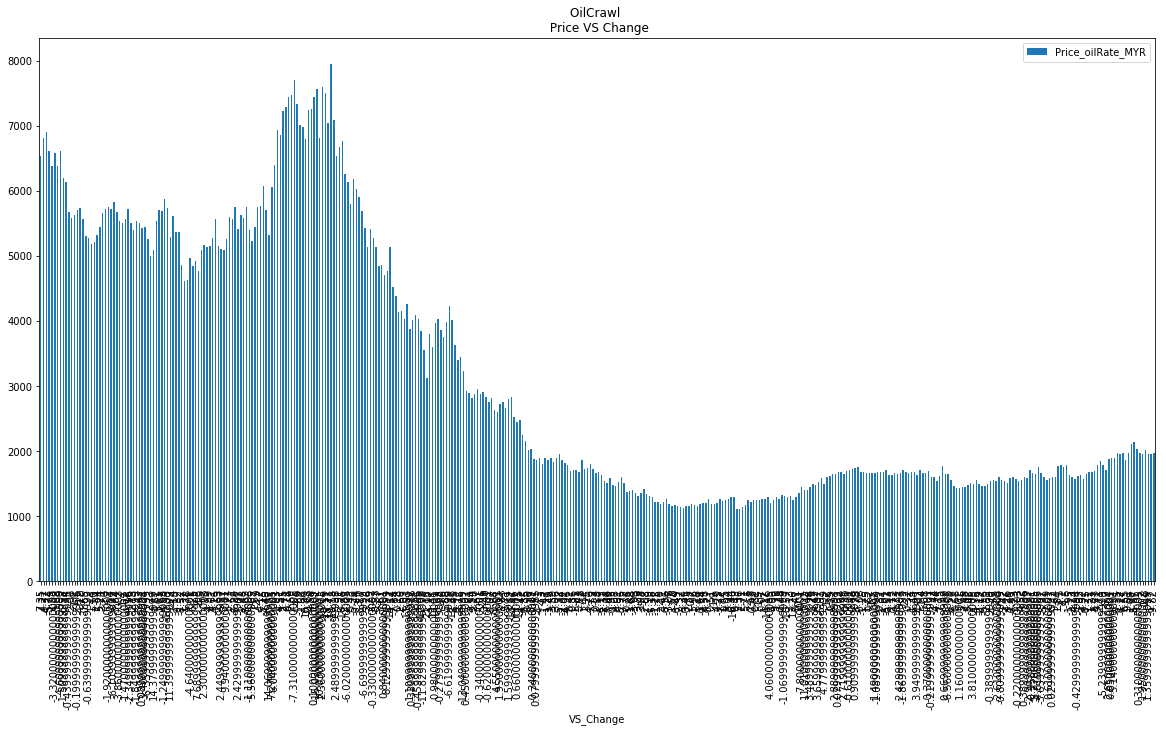

In [10]:
#plotting bar chart for OilCrawl data by checking the Price VS Change
cleanOilExchange.plot(x="VS_Change", y="Price_oilRate_MYR", kind="bar",
                      title="OilCrawl \n Price VS Change", figsize=(20, 10))

##### Summary of above bar chart for OilCrawl data by checking the Price VS Change
The OilCrawl Price versus Change are in the peak while the years goes, it been consistently stable with with standard high and low.

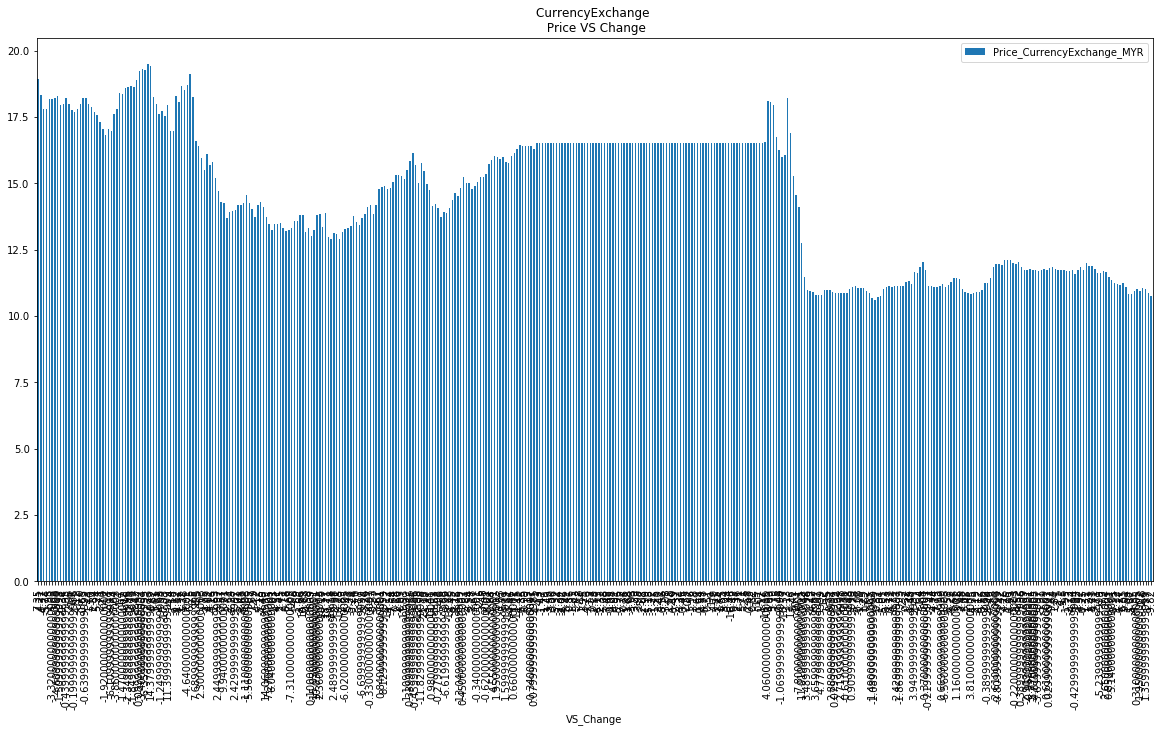

In [11]:
#plotting bar chart for CurrencyExchange data by checking the Price VS Change
cleanOilExchange.plot(x="VS_Change", y="Price_CurrencyExchange_MYR", kind="bar",
                      title="CurrencyExchange \n Price VS Change", figsize=(20, 10))

##### Summary of above bar chart for CurrencyExchange data by checking the Price VS Change
The CurrencyExchange Price versus Change it been up and down in the beginning while, in the midle it was flat with no changes, finally it drop down as it been consistently stable with with standard high and low.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaa026dd90>,
      dtype=object)

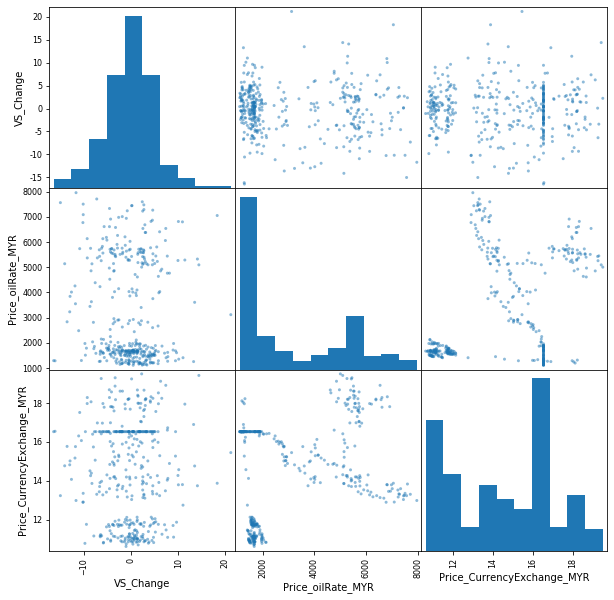

In [12]:
#scatter plot for cleanOilExchange
scatter_matrix(cleanOilExchange, figsize=(10, 10))

##### Summary of above scatter plot for cleanOilExchangee
1. VS_Changes over Price_oilRate_MYR - The relationships between variables are moderate, negative, and linear
2. VS_Changes over Price_CurrencyExchnage_MYR - The relationships between variables are strong and nonlinear
3. Price_oilRate_MYR over Price_CurrencyExchnage_MYR  - The relationships between variables are null and non-linear

[[ 5.97321429e-02  1.56518138e+03  1.36290179e+01]
 [-4.42674419e-01  5.48461535e+03  1.63332558e+01]
 [-1.10851852e+00  4.12117185e+03  1.52114815e+01]
 [-1.55200000e+00  2.82431560e+03  1.54920000e+01]
 [-2.58235294e-01  6.99907176e+03  1.44988235e+01]]


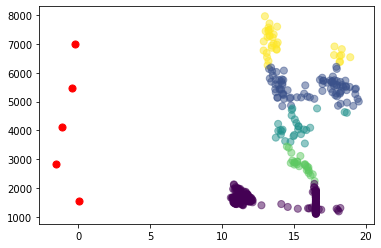

In [13]:
#plotting kmean using cluster of 5
cleanOilExchange = cleanOilExchange.drop(['MonthYear'], axis = 1)
kmeans = KMeans(n_clusters=5).fit(cleanOilExchange)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(cleanOilExchange['Price_CurrencyExchange_MYR'], cleanOilExchange['Price_oilRate_MYR'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

##### Summary of above Kmean plot for Price_CurrencyExchange_MYR over Price_oilRate_MYR
1. Used 5 cluster mode, K=5
2. The red bullet represent the centroid of each cluster
3. Those 5 clusters as Price_CurrencyExchange_MYR over Price_oilRate_MYR had different kinds of behaviors under different scenarios.

#### goldRate versus currencyExchange

In [14]:
#retrieving the data for currencyExchange for the year 2020 to 2015
currencyExchange2020 = currencyExchange[currencyExchange['MonthYear'].str.contains("20")]
currencyExchange2020 = currencyExchange2020['Change %'].sum(axis = 0, skipna = True)
currencyExchange2019 = currencyExchange[currencyExchange['MonthYear'].str.contains("19")]
currencyExchange2019 = currencyExchange2019['Change %'].sum(axis = 0, skipna = True)
currencyExchange2018 = currencyExchange[currencyExchange['MonthYear'].str.contains("18")]
currencyExchange2018 = currencyExchange2018['Change %'].sum(axis = 0, skipna = True)
currencyExchange2017 = currencyExchange[currencyExchange['MonthYear'].str.contains("17")]
currencyExchange2017 = currencyExchange2017['Change %'].sum(axis = 0, skipna = True)
currencyExchange2016 = currencyExchange[currencyExchange['MonthYear'].str.contains("16")]
currencyExchange2016 = currencyExchange2016['Change %'].sum(axis = 0, skipna = True)
currencyExchange2015 = currencyExchange[currencyExchange['MonthYear'].str.contains("15")]
currencyExchange2015 = currencyExchange2015['Change %'].sum(axis = 0, skipna = True)
print("currencyExchange2020 =",currencyExchange2020,",currencyExchange2019 =",currencyExchange2019,
      ",currencyExchange2018 =",currencyExchange2018,",currencyExchange2017 =",currencyExchange2017,
      ",currencyExchange2016 =",currencyExchange2016,",currencyExchange2015 =",currencyExchange2015)

currencyExchange2020 = 6.25 ,currencyExchange2019 = -0.9599999999999997 ,currencyExchange2018 = 2.2100000000000004 ,currencyExchange2017 = -10.2 ,currencyExchange2016 = 5.129999999999999 ,currencyExchange2015 = 21.4


In [15]:
#retrieving the data for goldRate for the year 2020 to 2015
goldRate2020 = goldRate[goldRate['Year']==2020]
goldRate2020 = goldRate2020['Change %'].item()
goldRate2019 = goldRate[goldRate['Year']==2019]
goldRate2019 = goldRate2019['Change %'].item()
goldRate2018 = goldRate[goldRate['Year']==2018]
goldRate2018 = goldRate2018['Change %'].item()
goldRate2017 = goldRate[goldRate['Year']==2017]
goldRate2017 = goldRate2017['Change %'].item()
goldRate2016 = goldRate[goldRate['Year']==2016]
goldRate2016 = goldRate2016['Change %'].item()
goldRate2015 = goldRate[goldRate['Year']==2015]
goldRate2015 = goldRate2015['Change %'].item()
print("goldRate2020 =",goldRate2020,",goldRate2019 =",goldRate2019,
      ",goldRate2018 =",goldRate2018,",goldRate2017 =",goldRate2017,
      ",goldRate2016 =",goldRate2016,",goldRate2015 =",goldRate2015)

goldRate2020 = -52.62 ,goldRate2019 = 34.46 ,goldRate2018 = -24.84 ,goldRate2017 = 12.47 ,goldRate2016 = 45.03 ,goldRate2015 = -30.7


In [16]:
#creating a new dataframe of Change % of gold and Change % of currency for the year 2020 to 2015
currencyVSgold_Changes = {'Year':['2020', '2019', '2018', '2017', '2016', '2015'],
                          'Change % of gold':[goldRate2020, goldRate2019, goldRate2018, goldRate2017, goldRate2016, goldRate2015],
                         'Change % of currency':[currencyExchange2020, currencyExchange2019, currencyExchange2018, currencyExchange2017, currencyExchange2016, currencyExchange2015]} 
currencyVSgold_Changes = pd.DataFrame(currencyVSgold_Changes)
currencyVSgold_Changes

,Year,Change % of gold,Change % of currency
0,2020,-52.62,6.25
1,2019,34.46,-0.96
2,2018,-24.84,2.21
3,2017,12.47,-10.20
4,2016,45.03,5.13
5,2015,-30.70,21.40


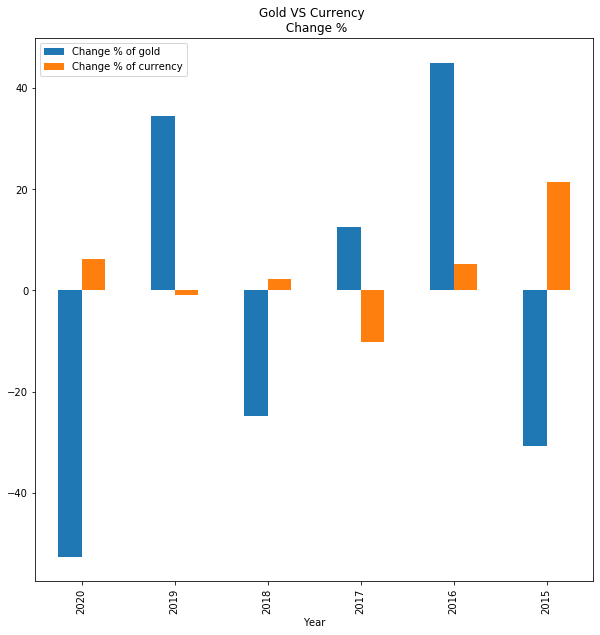

In [17]:
#plotting bar chart for Gold VS Currency on Change %
currencyVSgold_Changes.plot(x="Year", y=["Change % of gold","Change % of currency"], kind="bar",
                            title="Gold VS Currency \n Change %", figsize=(10, 10))

##### Summary of above bar chart for goldRate versus CurrencyExchanges data by checking Change %
goldRate versus CurrencyExchanges is not corresponding each other, from the graph above it show different out for the year 2020 to 2015

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaa188b0d0>,
      dtype=object)

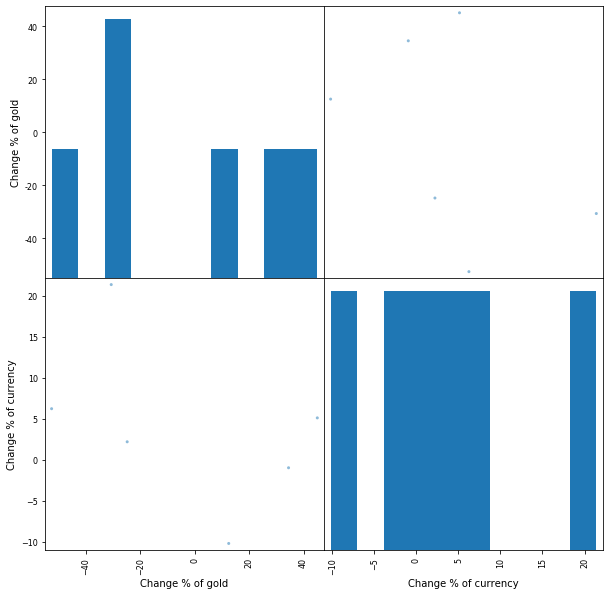

In [18]:
#scatter plot for currencyVSgold_Changes
scatter_matrix(currencyVSgold_Changes, figsize=(10, 10))

##### Summary of above scatter plot for currencyVSgold_Changes
VS_Changes over Price_oilRate_MYR have - The relationships between variables are null and non-linear

[[2017.5     39.745    2.085]
 [2015.     -30.7     21.4  ]
 [2017.      12.47   -10.2  ]
 [2020.     -52.62     6.25 ]
 [2018.     -24.84     2.21 ]]


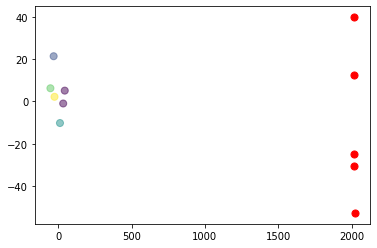

In [19]:
#plotting kmean using cluster of 5
kmeans = KMeans(n_clusters=5).fit(currencyVSgold_Changes)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(currencyVSgold_Changes['Change % of gold'], currencyVSgold_Changes['Change % of currency'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

##### Summary of above Kmean plot for Change % of gold over Change % of currency
1. Used 5 cluster mode, K=5
2. The red bullet represent the centroid of each cluster
3. Those 5 clusters as Change % of gold over Change % of currency had different kinds of behaviors under different scenarios.

### Overall Summary
1. This proof that the Currency Exchanges is not impacting or the reason why the gold rate and oil price is increasing.
2. From the obvervation above, the Currency Exchange does have drastically increase on the changes on the rate by year.
3. While gold rate and oil price, does have some up and down on the changes, this might be some of other reason.
4. In future would like to include some other reasonable dataset to corelate the changes